In [1]:
import uproot as up
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT
import matplotlib.pyplot as plt
# from fit_types import fit_unbinned_double_gauss, fit_unbinned_gauss_with_background

Welcome to JupyROOT 6.26/10


In [2]:
# dataset = '../output/ZmmYee/Data/crab_TTree_13TeV_fourmuon_Run2UL_v6.root'
# savepath = 'plots/Data/cuts_v6_run2/'
dataset = '../output/ZmmYee/MC/ZmmMCOut.root'
savepath = 'plots/MC/cuts_v6_run2/'

In [3]:
# open the file
file = up.open(dataset)
events = file['ntuple;1']
columns = ['Event', 'Run', 'LumiBlock',
           'Mu_TriggerPath',
           'Z_soft1', 'Z_soft2',
           'Z_Vtx_Mass', 'Z_mass',
           'Z_pt1', 'Z_pt2', 'Z_eta1', 'Z_eta2',
           'Z_lowPt', 'Z_highPt',
           'Y_Vtx_Mass', 'Y_mass',
           'Y_pt1', 'Y_pt2', 'Y_eta1', 'Y_eta2',
           'Y_mvaIsoWP90_1', 'Y_mvaIsoWP90_2',
           'Z_Vtx_Prob', 'Y_Vtx_Prob',
           'FourL_mass', 'FourL_Vtx_Prob',
           'Y_lowPt', 'Y_highPt']
# branches = events.arrays(columns, entry_start=430, entry_stop=450)
branches = events.arrays(columns)

In [4]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['Y_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [5]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 3511
Number of events Preselection: 3330


In [6]:
print(ak.sum(branches.Y_pt1 > branches.Y_pt2))
print(ak.sum(branches.Z_pt1 > branches.Z_pt2))
print(ak.sum(branches.Z_lowPt < branches.Z_highPt))

# remove events with Z_pt1 < Z_pt2
cut_highLow_candi= (branches.Z_pt1 > branches.Z_pt2)
cut_highLow_events = ak.any(cut_highLow_candi, axis=1)

branches = branches[cut_highLow_candi][cut_highLow_events]

cut_highLow_candi_Y = (branches.Y_pt1 > branches.Y_pt2)
cut_highLow_events_Y = ak.any(cut_highLow_candi_Y, axis=1)

branches = branches[cut_highLow_candi_Y][cut_highLow_events_Y]

print_summary(branches, 'Z pt1 > Z pt2')

3511
3511
3511
Number of candidates Z pt1 > Z pt2: 3511
Number of events Z pt1 > Z pt2: 3330


In [7]:
cut_YTrigger_candi = branches['Mu_TriggerPath']
cut_YTrigger_event = ak.any(cut_YTrigger_candi, axis=1)

branches = branches[cut_YTrigger_candi][cut_YTrigger_event]

print_summary(branches, "Trigger")

Number of candidates Trigger: 3275
Number of events Trigger: 3111


In [8]:
cut_Zsoft_candi = branches['Z_soft1'] & branches['Z_soft2']
cut_Zsoft_event = ak.any(cut_Zsoft_candi, axis=1)

branches = branches[cut_Zsoft_candi][cut_Zsoft_event]

print_summary(branches, "Soft Muons")

Number of candidates Soft Muons: 3211
Number of events Soft Muons: 3075


In [9]:
# events with hights pt muon > 24
cut_highPt24_candi = branches['Z_highPt'] > 24
cut_highPt24_event = ak.any(cut_highPt24_candi, axis=1)

branches = branches[cut_highPt24_candi][cut_highPt24_event]

print_summary(branches, "High Pt Muon")

Number of candidates High Pt Muon: 3207
Number of events High Pt Muon: 3074


Number of candidates Dilepton Vtx: 3065
Number of events Dilepton Vtx: 2949


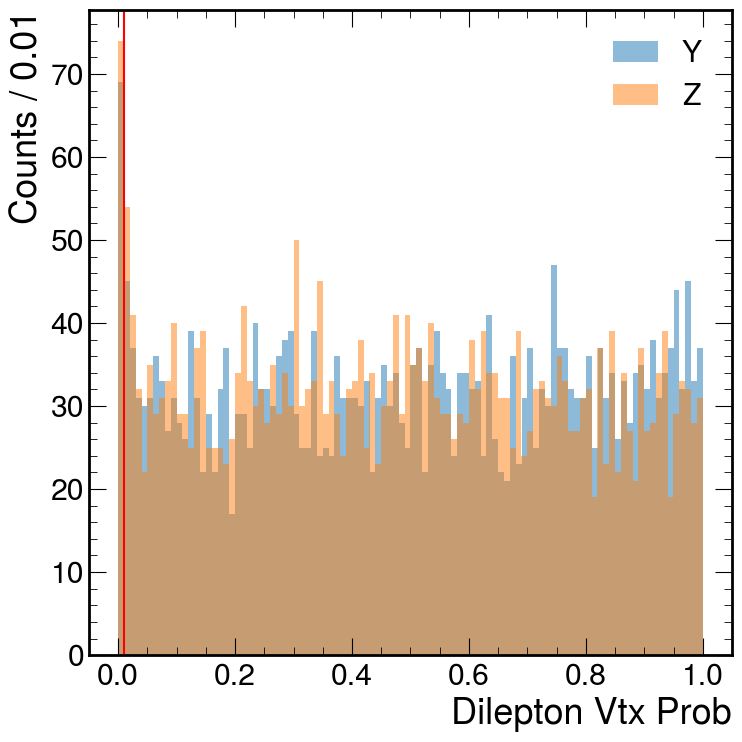

In [10]:
cut_dilepton_candi = (branches['Y_Vtx_Prob'] > 0.01) & (branches['Z_Vtx_Prob'] > 0.01)
cut_dilepton_event = ak.any(cut_dilepton_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 100, 0, 1
plt.hist(ak.flatten(branches.Y_Vtx_Prob), bins=nbins, label="Y", alpha=0.5)
plt.hist(ak.flatten(branches.Z_Vtx_Prob), bins=nbins, label="Z", alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('Dilepton Vtx Prob')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/vtx_prob_dilepton.png")

branches = branches[cut_dilepton_candi][cut_dilepton_event]

print_summary(branches, "Dilepton Vtx")

Number of candidates FourL Vtx: 2980
Number of events FourL Vtx: 2872


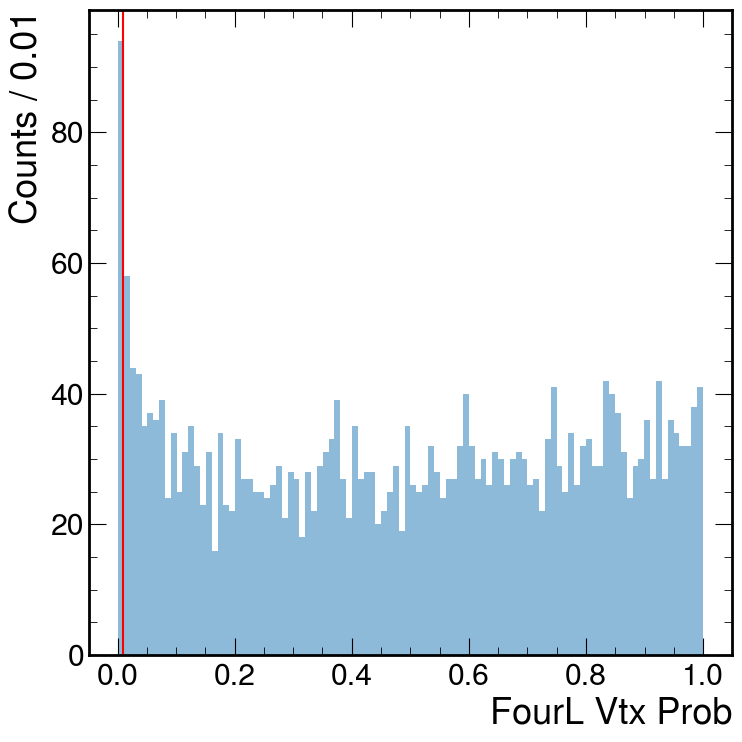

In [11]:
cut_FourL_candi = (branches['FourL_Vtx_Prob'] > 0.01)
cut_FourL_event = ak.any(cut_FourL_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 100, 0, 1
plt.hist(ak.flatten(branches.FourL_Vtx_Prob), bins=nbins, alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('FourL Vtx Prob')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f}")
plt.tight_layout()
plt.savefig(f"{savepath}/vtx_prob_fourL.png")

branches = branches[cut_FourL_candi][cut_FourL_event]

print_summary(branches, "FourL Vtx")

Number of candidates Detector: 2054
Number of events Detector: 2034


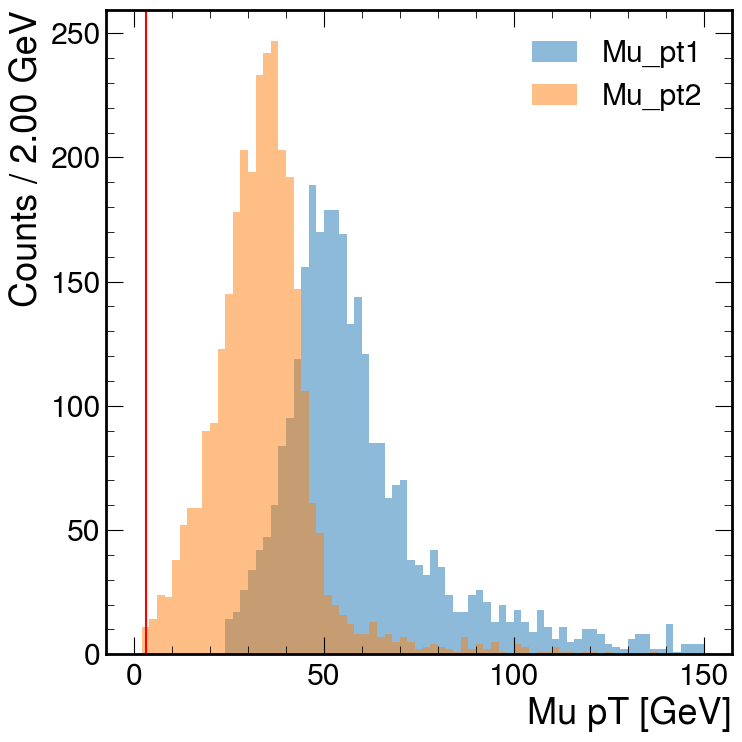

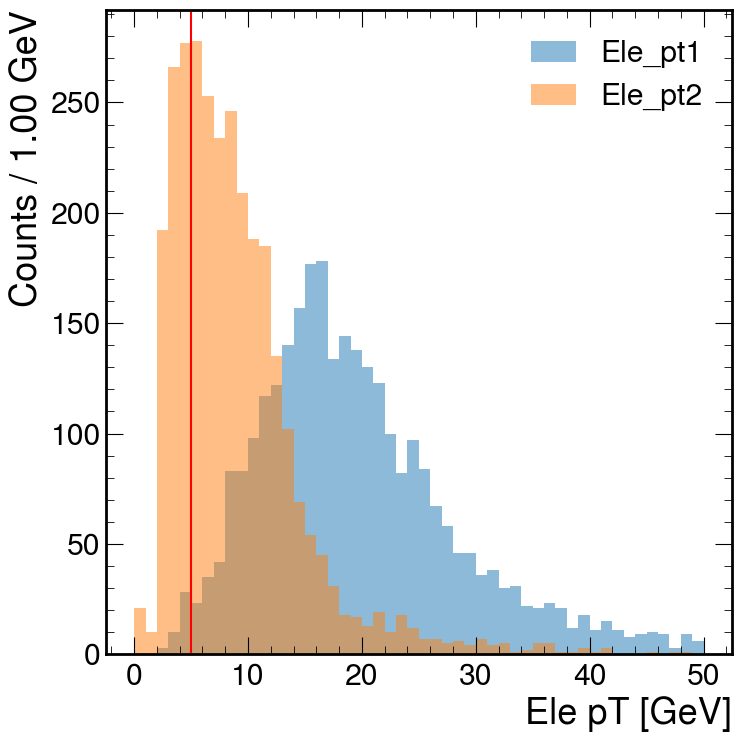

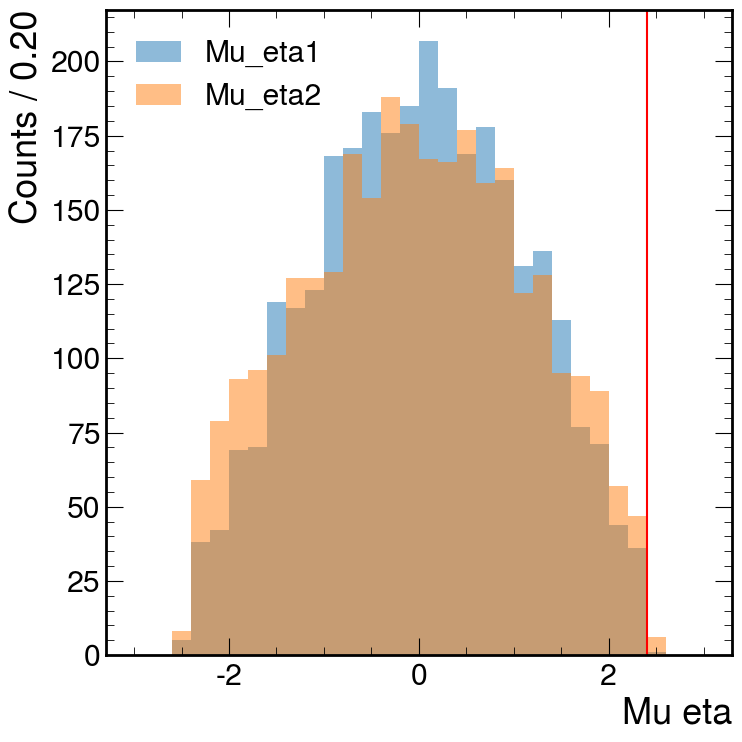

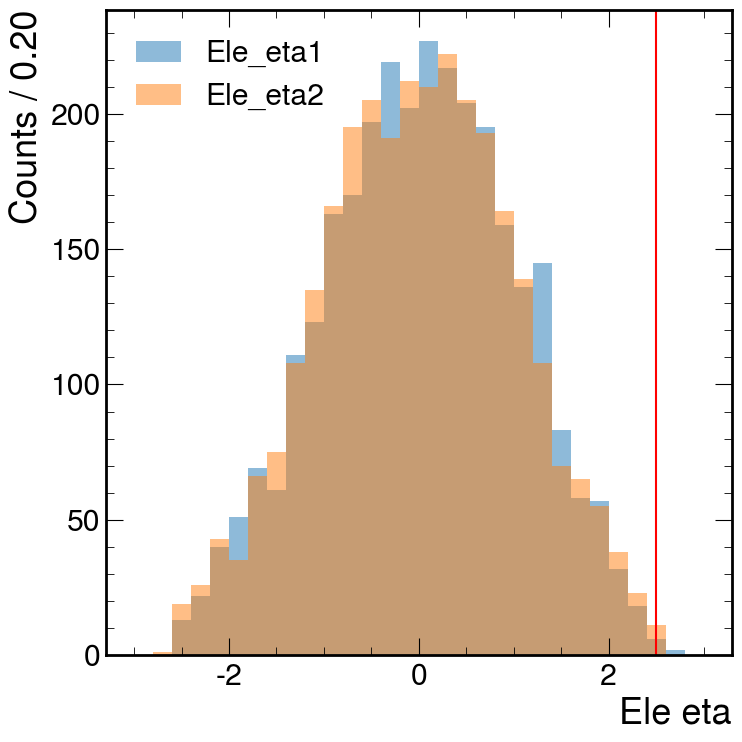

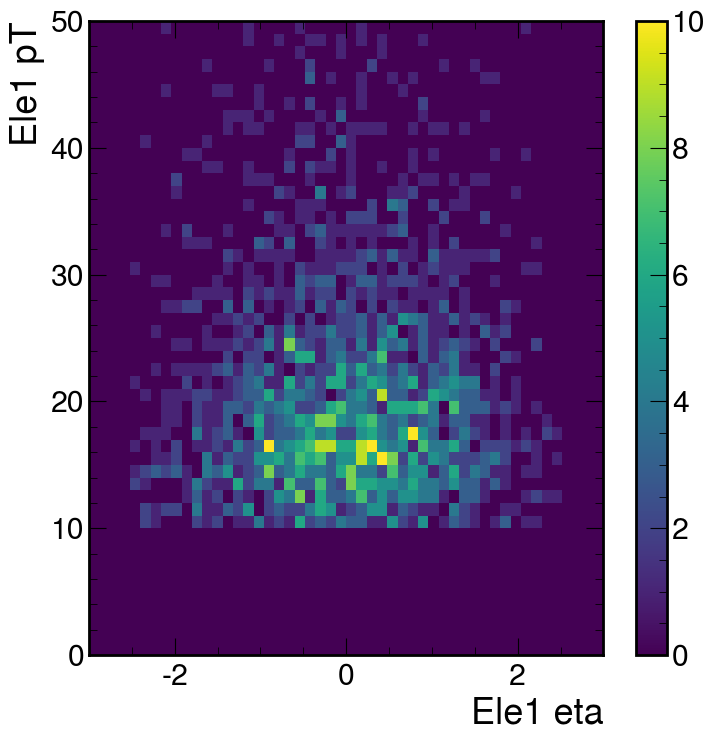

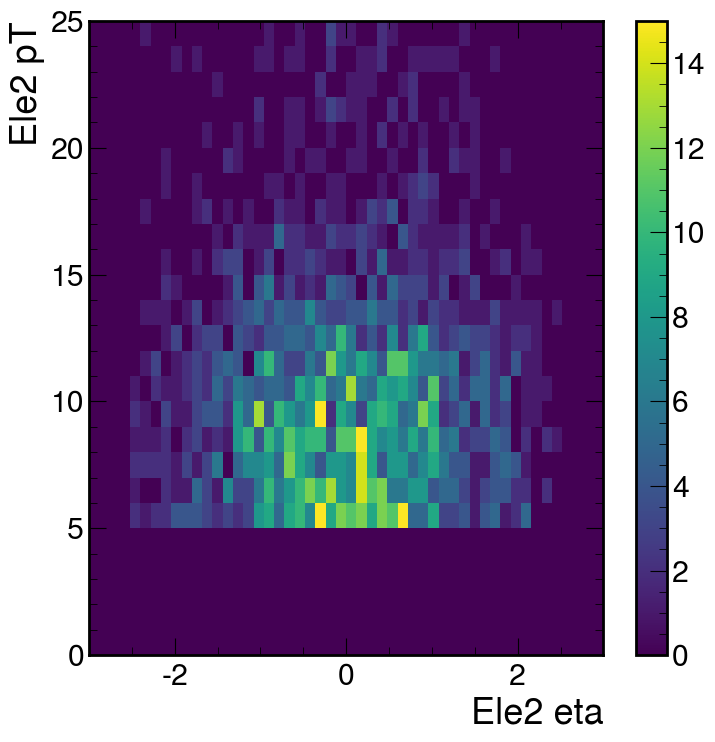

In [12]:
cut_Pt_candi = (branches['Z_pt1'] > 3.0) & (branches['Z_pt2'] > 3.0) & (branches['Y_pt1'] > 10.0) & (branches['Y_pt2'] > 5.0)
cut_eta_candi = (abs(branches['Z_eta1']) < 2.4) & (abs(branches['Z_eta2']) < 2.4) & (abs(branches['Y_eta1']) < 2.5) & (abs(branches['Y_eta2']) < 2.5)
cut_detector_candi = cut_Pt_candi & cut_eta_candi
cut_detector_event = ak.any(cut_detector_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 75, 0, 150
plt.hist(ak.flatten(branches.Z_pt1), bins=nbins, label="Mu_pt1", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.hist(ak.flatten(branches.Z_pt2), bins=nbins, label="Mu_pt2", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.axvline(3.0, color='r')
plt.xlabel("Mu pT [GeV]")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Mu_pt.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 50, 0, 50
plt.hist(ak.flatten(branches.Y_pt1), bins=nbins, label="Ele_pt1", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.hist(ak.flatten(branches.Y_pt2), bins=nbins, label="Ele_pt2", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.axvline(5.0, color='r')
plt.xlabel("Ele pT [GeV]")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Ele_pt.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, -3, 3
plt.hist(ak.flatten(branches.Z_eta1), bins=nbins, label="Mu_eta1", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.hist(ak.flatten(branches.Z_eta2), bins=nbins, label="Mu_eta2", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.axvline(2.4, color='r')
plt.xlabel("Mu eta")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Mu_eta.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, -3, 3
plt.hist(ak.flatten(branches.Y_eta1), bins=nbins, label="Ele_eta1", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.hist(ak.flatten(branches.Y_eta2), bins=nbins, label="Ele_eta2", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.axvline(2.5, color='r')
plt.xlabel("Ele eta")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Ele_eta.png")

# plt.figure(figsize=(8, 8))
# plt.plot(ak.flatten(branches.Y_eta1), ak.flatten(branches.Y_pt1), '.', label='Ele1')
# plt.xlim(-3, 3)
# plt.legend()
# plt.xlabel('Ele eta')
# plt.ylabel('Ele pT')
# plt.tight_layout()

# plt.figure(figsize=(8, 8))
# plt.plot(ak.flatten(branches.Y_eta2), ak.flatten(branches.Y_pt2), '.', label='Ele2')
# plt.xlim(-3, 3)
# plt.legend()
# plt.xlabel('Ele eta')
# plt.ylabel('Ele pT')
# plt.tight_layout()

branches = branches[cut_detector_candi][cut_detector_event]

# draw a 2D histogram of the eta and pt of the electrons
plt.figure(figsize=(8, 8))
eta = ak.flatten(branches.Y_eta1).tolist()
pt = ak.flatten(branches.Y_pt1).tolist()
plt.hist2d(eta, pt, bins=(50, 50), range=((-3, 3), (0, 50)))
plt.colorbar()
plt.xlabel('Ele1 eta')
plt.ylabel('Ele1 pT')
plt.tight_layout()
plt.savefig(f"{savepath}/Ele1_eta_pt.png")

plt.figure(figsize=(8, 8))
eta = ak.flatten(branches.Y_eta2).tolist()
pt = ak.flatten(branches.Y_pt2).tolist()
plt.hist2d(eta, pt, bins=(50, 25), range=((-3, 3), (0, 25)))
plt.colorbar()
plt.xlabel('Ele2 eta')
plt.ylabel('Ele2 pT')
plt.tight_layout()
plt.savefig(f"{savepath}/Ele2_eta_pt.png")

print_summary(branches, "Detector")

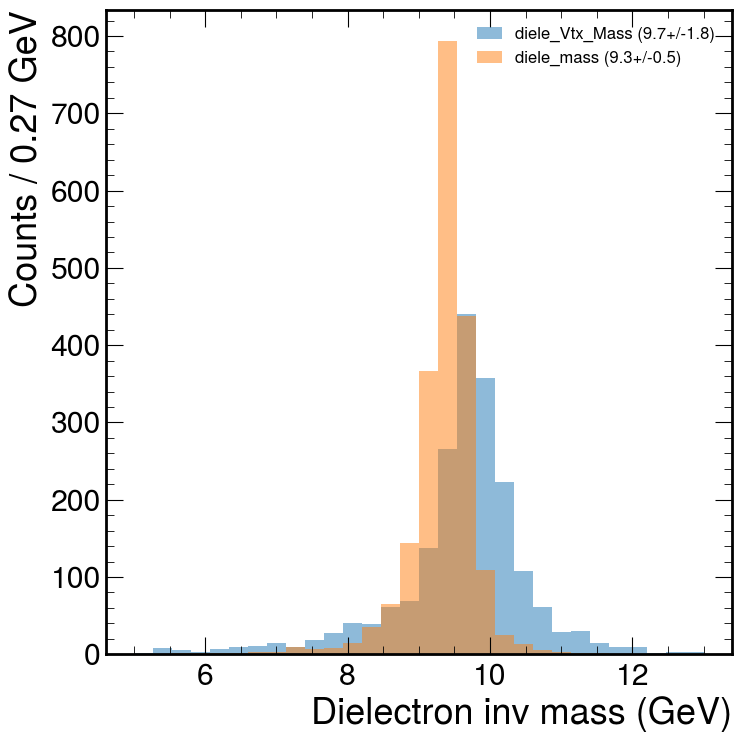

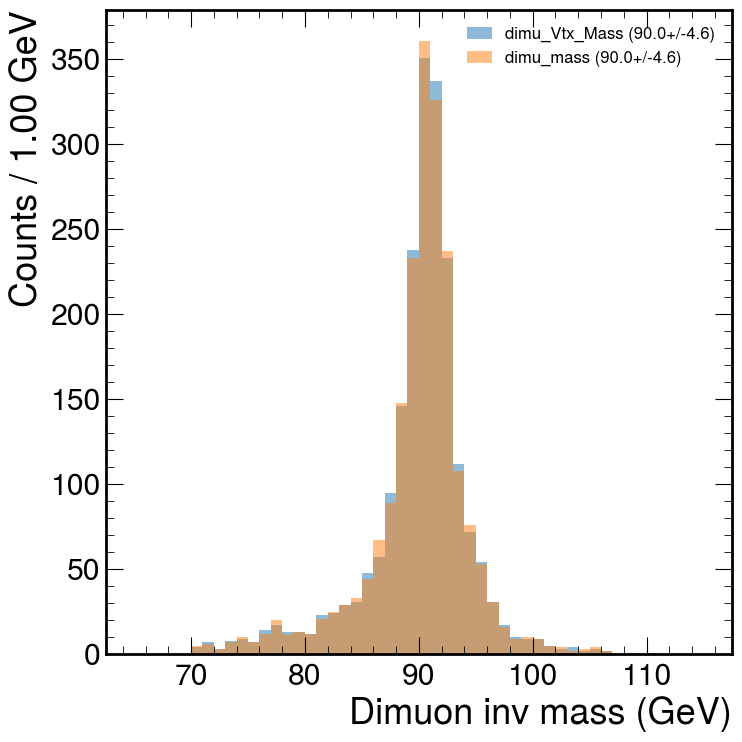

In [13]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 5, 13

mean_Ymass = np.mean(ak.flatten(branches.Y_mass))
std_Ymass = np.std(ak.flatten(branches.Y_mass))
mean_Yvtxmass = np.mean(ak.flatten(branches.Y_Vtx_Mass))
std_Yvtxmass = np.std(ak.flatten(branches.Y_Vtx_Mass))

plt.hist(ak.flatten(branches.Y_Vtx_Mass), bins=nbins, label=f"diele_Vtx_Mass ({mean_Yvtxmass:.1f}+/-{std_Yvtxmass:.1f})", alpha=0.5, range=(xlow, xhigh))
plt.hist(ak.flatten(branches.Y_mass), bins=nbins, label=f"diele_mass ({mean_Ymass:.1f}+/-{std_Ymass:.1f})", alpha=0.5, range=(xlow, xhigh))

plt.legend(fontsize=12)
plt.xlabel('Dielectron inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/Vtx_vs_normal_mass_Y.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 50, 65, 115

mean_Zmass = np.mean(ak.flatten(branches.Z_mass))
std_Zmass = np.std(ak.flatten(branches.Z_mass))
mean_Zvtxmass = np.mean(ak.flatten(branches.Z_Vtx_Mass))
std_Zvtxmass = np.std(ak.flatten(branches.Z_Vtx_Mass))

plt.hist(ak.flatten(branches.Z_Vtx_Mass), bins=nbins, label=f"dimu_Vtx_Mass ({mean_Zvtxmass:.1f}+/-{std_Zvtxmass:.1f})", alpha=0.5, range=(xlow, xhigh))
plt.hist(ak.flatten(branches.Z_mass), bins=nbins, label=f"dimu_mass ({mean_Zmass:.1f}+/-{std_Zmass:.1f})", alpha=0.5, range=(xlow, xhigh))

plt.legend(fontsize=12)
plt.xlabel('Dimuon inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/Vtx_vs_normal_mass_Z.png")

In [14]:
before_mass_cuts_Y = ak.flatten(branches['Y_mass'])
Hpt_before_mass_cuts_Y = ak.flatten(branches['Y_pt1'])
Lpt_before_mass_cuts_Y = ak.flatten(branches['Y_pt2'])

before_mass_cuts_Z = ak.flatten(branches['Z_mass'])
Hpt_before_mass_cuts_Z = ak.flatten(branches['Z_pt1'])
Lpt_before_mass_cuts_Z = ak.flatten(branches['Z_pt2'])

Number of candidates Y mass: 1954
Number of events Y mass: 1940


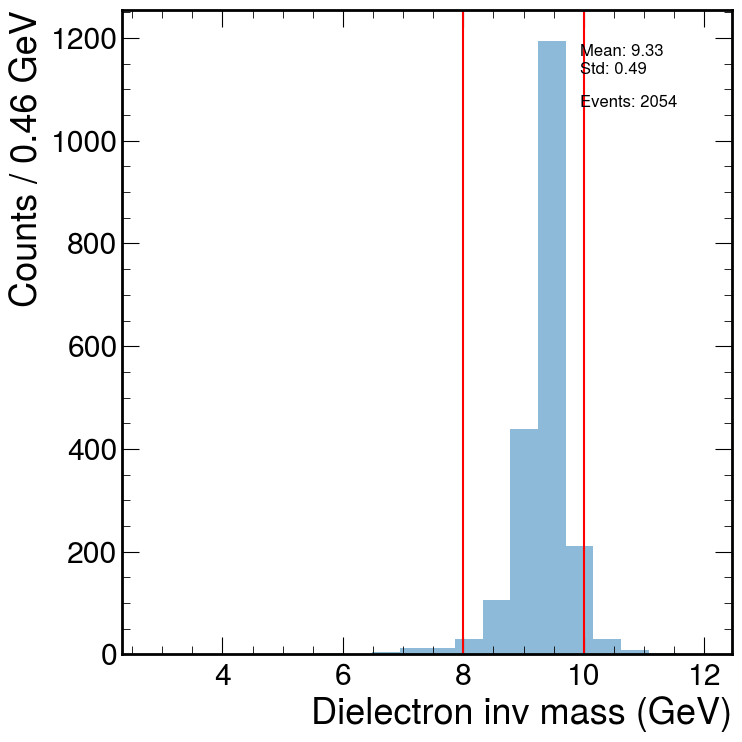

In [15]:
cut_Ymass_candi = (branches['Y_mass'] > 8) & (branches['Y_mass'] < 10)
cut_Ymass_event = ak.any(cut_Ymass_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 2.8, 12
plt.hist(ak.flatten(branches.Y_mass), bins=nbins, label="Y_mass", alpha=0.5, range=(xlow, xhigh))
mean = np.mean(ak.flatten(branches.Y_mass))
std = np.std(ak.flatten(branches.Y_mass))
plt.text(0.75, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.75, 0.85, f"Events: {len(ak.flatten(branches.Y_mass))}", transform=plt.gca().transAxes, fontsize=12)
plt.axvline(x=8, color='r')
plt.axvline(x=10, color='r')
plt.xlabel('Dielectron inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/Y_mass_cut.png")

branches = branches[cut_Ymass_candi][cut_Ymass_event]

print_summary(branches, "Y mass")

Number of candidates Z mass: 1954
Number of events Z mass: 1940


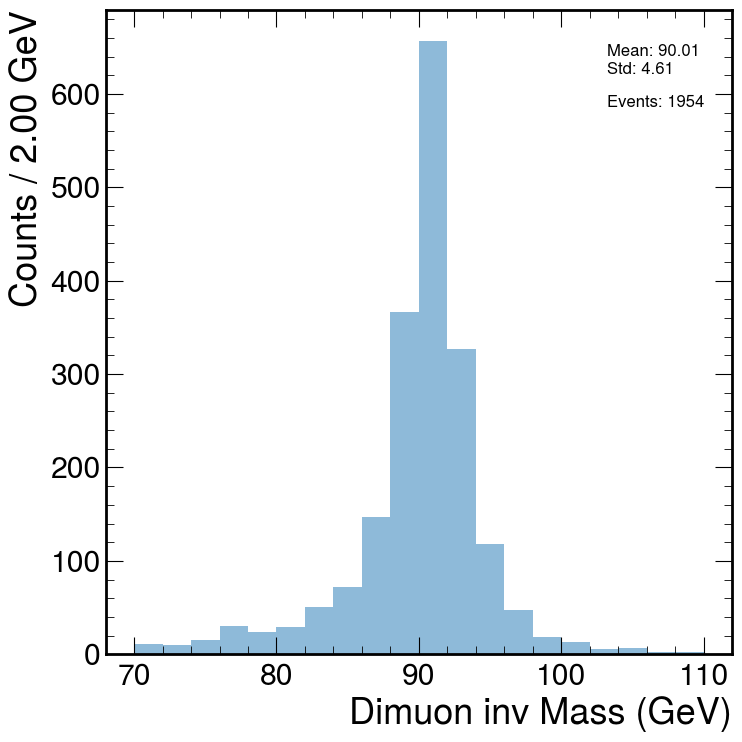

In [16]:
cut_Zmass_candi = (branches['Z_mass'] > 70) & (branches['Z_mass'] < 110)
cut_Zmass_event = ak.any(cut_Zmass_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 70, 110
plt.hist(ak.flatten(branches.Z_mass), bins=nbins, label="Z_mass", alpha=0.5, range=(xlow, xhigh))
mean = np.mean(ak.flatten(branches.Z_mass))
std = np.std(ak.flatten(branches.Z_mass))
plt.text(0.8, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.8, 0.85, f"Events: {len(ak.flatten(branches.Z_mass))}", transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Dimuon inv Mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/Z_mass_cut.png")

branches = branches[cut_Zmass_candi][cut_Zmass_event]

print_summary(branches, "Z mass")

In [17]:
before_ID_cuts_Y = ak.flatten(branches['Y_mass'])
Hpt_before_ID_cuts_Y = ak.flatten(branches['Y_pt1'])
Lpt_before_ID_cuts_Y = ak.flatten(branches['Y_pt2'])

before_ID_cuts_Z = ak.flatten(branches['Z_mass'])
Hpt_before_ID_cuts_Z = ak.flatten(branches['Z_pt1'])
Lpt_before_ID_cuts_Z = ak.flatten(branches['Z_pt2'])

eleID_cut_type = "high pT" # "low pT", "high pT", "both"
print(eleID_cut_type)

# if eleID_cut_type == "low pT":
#     cut_YmvaIso_candi = branches['Y_mvaIsoWP90_2']
# elif eleID_cut_type == "high pT":
#     cut_YmvaIso_candi = branches['Y_mvaIsoWP90_1']
# elif eleID_cut_type == "both":
#     cut_YmvaIso_candi = branches['Y_mvaIsoWP90_1'] & branches['Y_mvaIsoWP90_2']
# else:
#     print("Invalid eleID_cut_type")

# cut_YmvaIso_event = ak.any(cut_YmvaIso_candi, axis=1)

# branches = branches[cut_YmvaIso_candi][cut_YmvaIso_event]

print_summary(branches, "YmvaIso")

high pT
Number of candidates YmvaIso: 1954
Number of events YmvaIso: 1940


In [18]:
before_trig_cut_Y = ak.flatten(branches['Y_mass'])
Hpt_before_trig_cut_Y = ak.flatten(branches['Y_pt1'])
Lpt_before_trig_cut_Y = ak.flatten(branches['Y_pt2'])

before_trig_cut_Z = ak.flatten(branches['Z_mass'])
Hpt_before_trig_cut_Z = ak.flatten(branches['Z_pt1'])
Lpt_before_trig_cut_Z = ak.flatten(branches['Z_pt2'])

Number of candidates FourL mass: 1911
Number of events FourL mass: 1901


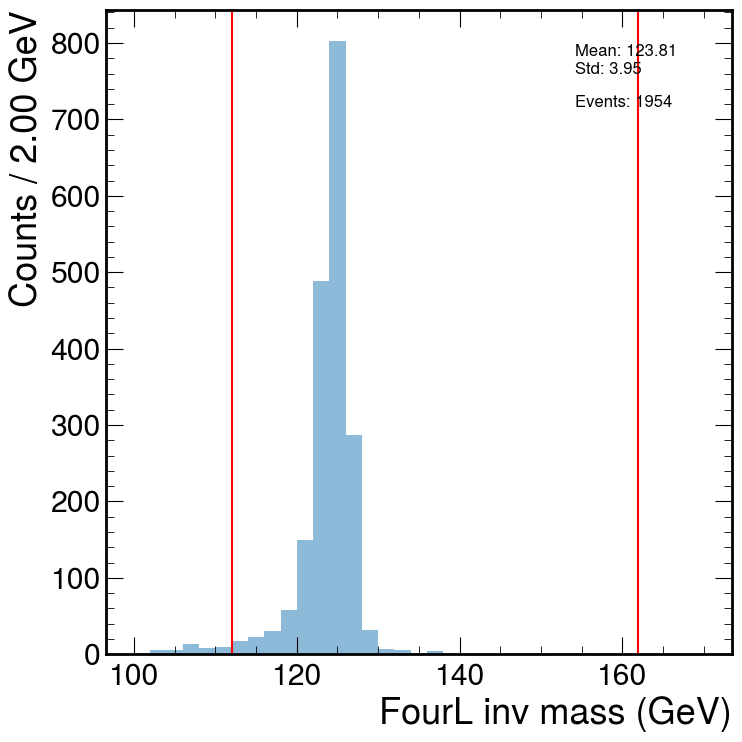

In [19]:
cut_FourLmass_candi = (branches['FourL_mass'] > 112) & (branches['FourL_mass'] < 162)
cut_FourLmass_event = ak.any(cut_FourLmass_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 35, 100, 170
plt.hist(ak.flatten(branches.FourL_mass), bins=nbins, label="FourL_mass", alpha=0.5, range=(xlow, xhigh))
mean = np.mean(ak.flatten(branches.FourL_mass))
std = np.std(ak.flatten(branches.FourL_mass))
plt.text(0.75, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.75, 0.85, f"Events: {len(ak.flatten(branches.FourL_mass))}", transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('FourL inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.axvline(112, color='r')
plt.axvline(162, color='r')
plt.tight_layout()
plt.savefig(f"{savepath}/FourL_mass_with_{eleID_cut_type}.png")

branches = branches[cut_FourLmass_candi][cut_FourLmass_event]

print_summary(branches, "FourL mass")

## Plotting cut steps

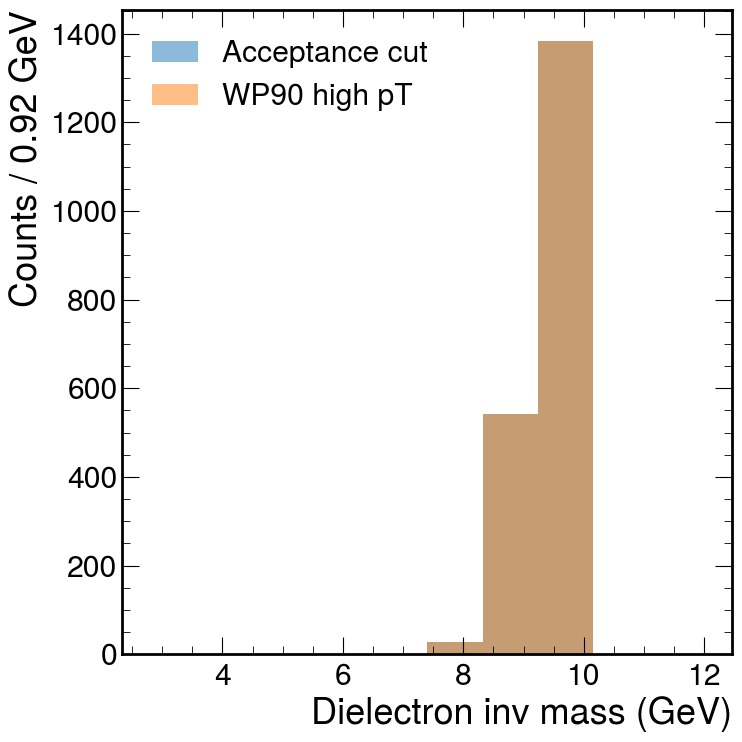

In [20]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 2.8, 12

plt.hist(before_ID_cuts_Y, bins=nbins, label="Acceptance cut", alpha=0.5, range=(xlow, xhigh))
plt.hist(before_trig_cut_Y, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('Dielectron inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Y_mass_dist_for {eleID_cut_type} cuts.png")



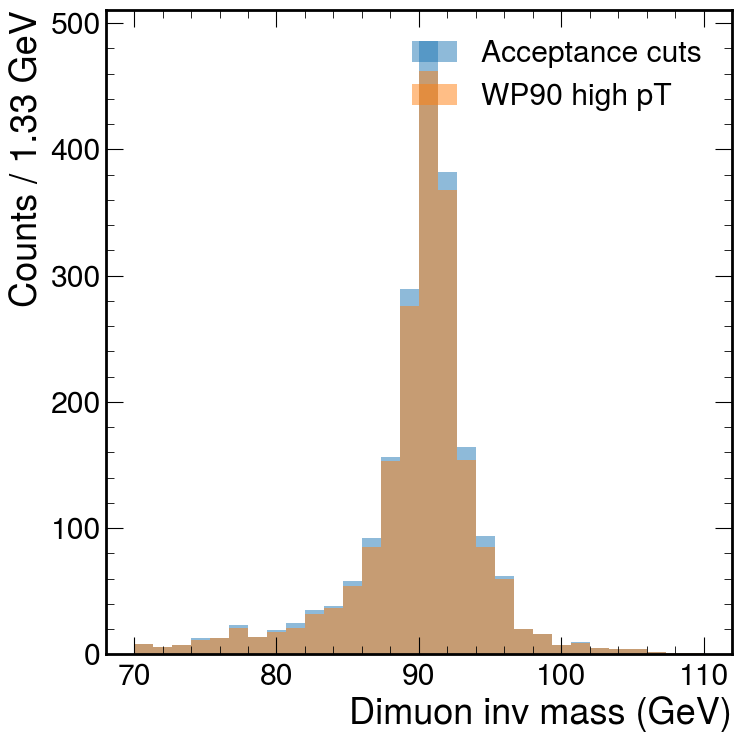

In [21]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 70, 110

plt.hist(before_mass_cuts_Z, bins=nbins, label="Acceptance cuts", alpha=0.5, range=(xlow, xhigh))
# plt.hist(before_ID_cuts_Z, bins=nbins, label="Mass cut", alpha=0.5, range=(xlow, xhigh))
plt.hist(before_trig_cut_Z, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('Dimuon inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Z_mass_dist_for {eleID_cut_type} cuts.png")

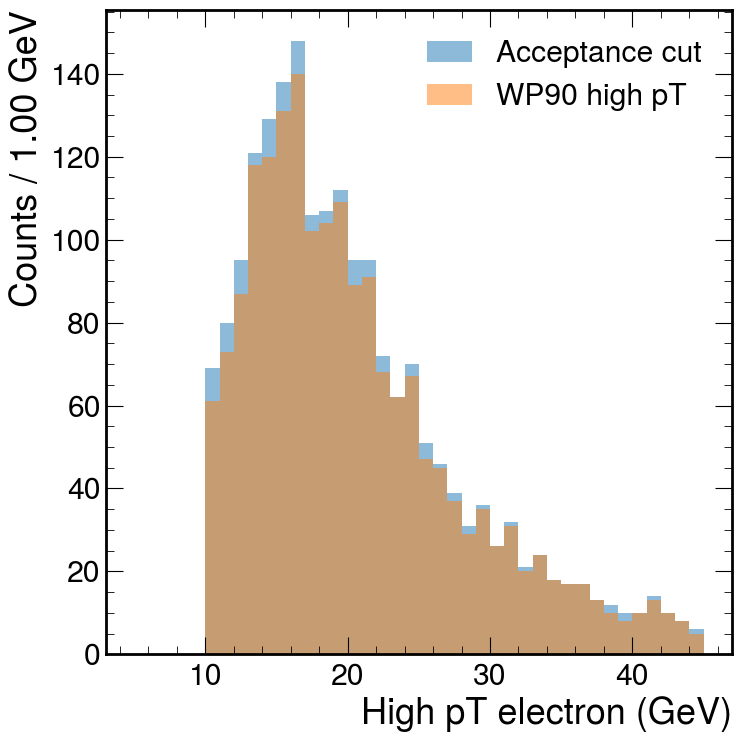

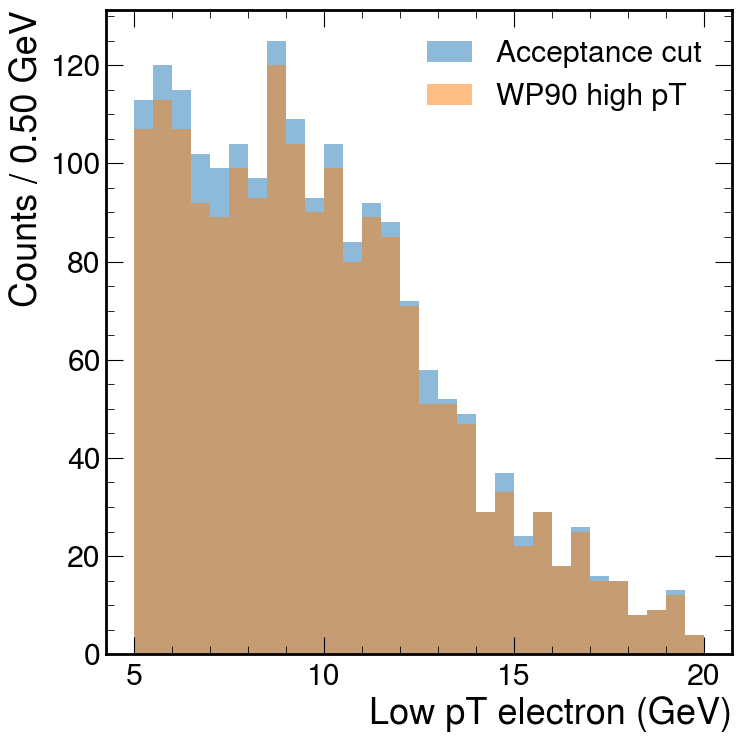

In [22]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 40, 5, 45

plt.hist(Hpt_before_mass_cuts_Y, bins=nbins, label="Acceptance cut", alpha=0.5, range=(xlow, xhigh))
# plt.hist(Hpt_before_ID_cuts_Y, bins=nbins, label="Mass", alpha=0.5, range=(xlow, xhigh))
plt.hist(Hpt_before_trig_cut_Y, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('High pT electron (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Y_highPt_dist_for {eleID_cut_type} cuts.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 5, 20

plt.hist(Lpt_before_mass_cuts_Y, bins=nbins, label="Acceptance cut", alpha=0.5, range=(xlow, xhigh))
# plt.hist(Lpt_before_ID_cuts_Y, bins=nbins, label="Mass", alpha=0.5, range=(xlow, xhigh))
plt.hist(Lpt_before_trig_cut_Y, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('Low pT electron (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Y_lowPt_dist_for {eleID_cut_type} cuts.png")

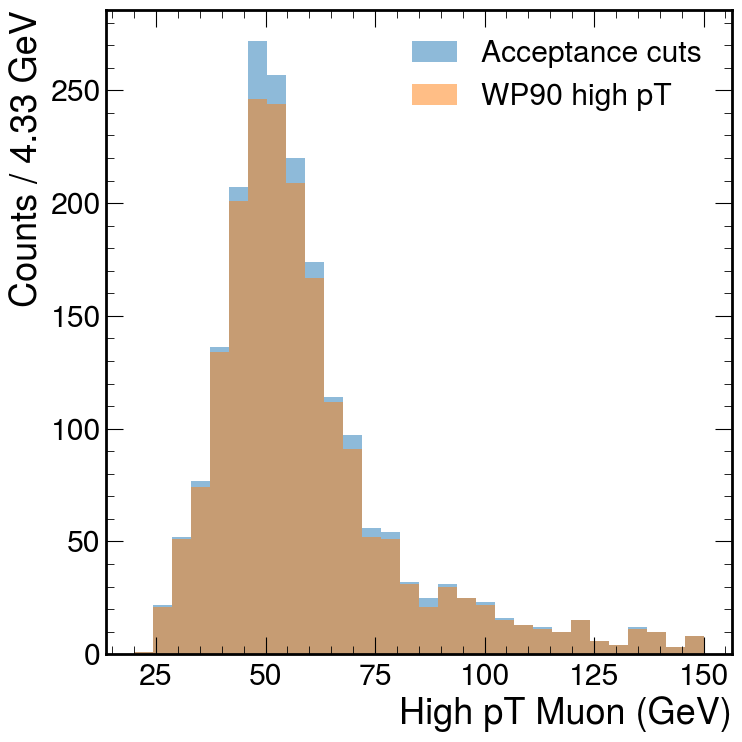

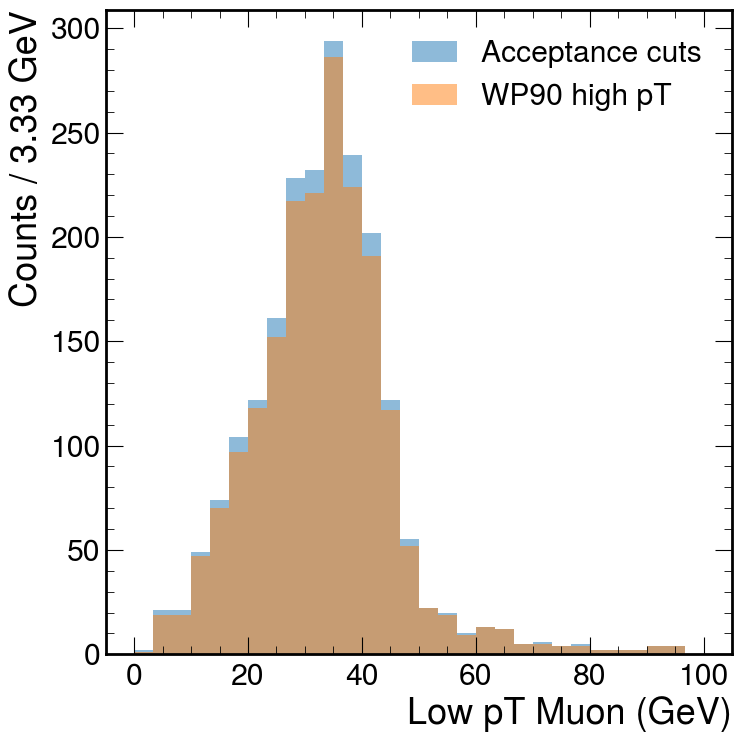

In [23]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 20, 150

plt.hist(Hpt_before_mass_cuts_Z, bins=nbins, label="Acceptance cuts", alpha=0.5, range=(xlow, xhigh))
# plt.hist(Hpt_before_ID_cuts_Z, bins=nbins, label="Mass cut", alpha=0.5, range=(xlow, xhigh))
plt.hist(Hpt_before_trig_cut_Z, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('High pT Muon (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Z_highPt_dist_for {eleID_cut_type} cuts.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 0, 100

plt.hist(Lpt_before_mass_cuts_Z, bins=nbins, label="Acceptance cuts", alpha=0.5, range=(xlow, xhigh))
# plt.hist(Lpt_before_ID_cuts_Z, bins=nbins, label="Mass cut", alpha=0.5, range=(xlow, xhigh))
plt.hist(Lpt_before_trig_cut_Z, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('Low pT Muon (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Z_lowPt_dist_for {eleID_cut_type} cuts.png")

In [24]:
# highestPt_muon = ak.argmax(branches.Z_highPt, axis=1, keepdims=True, mask_identity=True)

# cut_ZtrackIso_candi = (branches['Z_trackIso1'][highestPt_muon] < 0.35) & (branches['Z_trackIso2'][highestPt_muon] < 0.35)
# cut_ZtrackIso_event = ak.any(cut_ZtrackIso_candi, axis=1)

# plt.hist(ak.flatten(branches.Z_trackIso1[highestPt_muon]), bins=100, range=(0, 2), label="Z_trackIso1", alpha=0.5)
# plt.hist(ak.flatten(branches.Z_trackIso2[highestPt_muon]), bins=100, range=(0, 2), label="Z_trackIso2", alpha=0.5)
# plt.axvline(x=0.35, color='r')
# plt.xlabel('Z_trackIso')
# # plt.xlim([0,1])
# plt.legend()

# branches = branches[cut_ZtrackIso_candi][cut_ZtrackIso_event]

# print_summary(branches, "ZTrackIso")

## Fitting

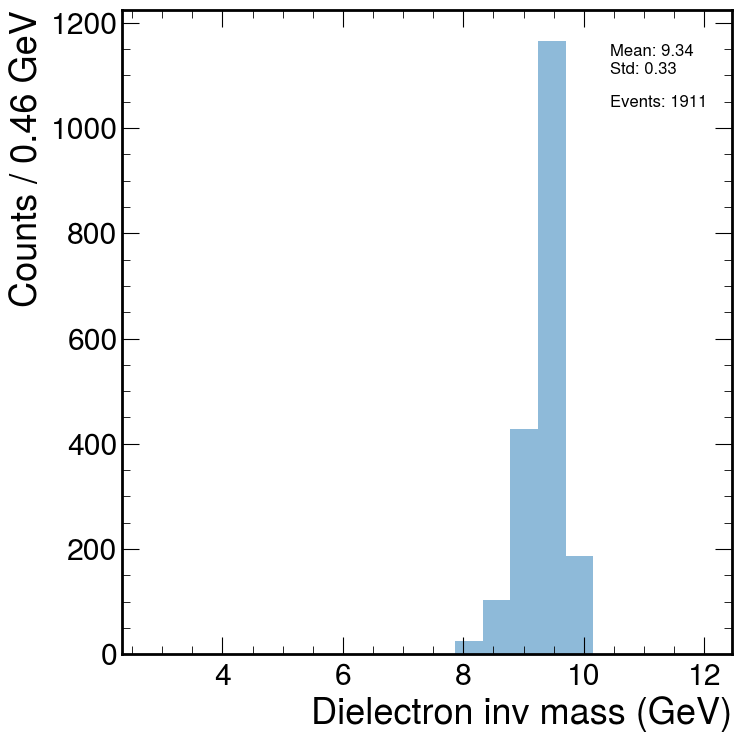

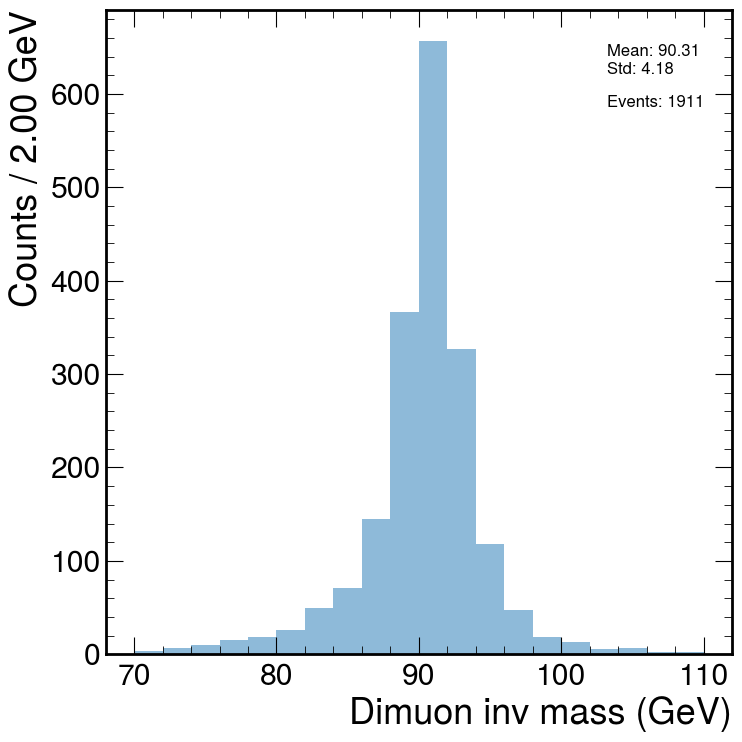

In [25]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 2.8, 12
plt.hist(ak.flatten(branches.Y_mass), bins=nbins, label="Y_mass", alpha=0.5, range=(xlow, xhigh))

# show mean and std on plot
mean = np.mean(ak.flatten(branches.Y_mass))
std = np.std(ak.flatten(branches.Y_mass))
plt.text(0.8, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.8, 0.85, f"Events: {len(ak.flatten(branches.Y_mass))}", transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('Dielectron inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/fit_histogram_Y_{eleID_cut_type}.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 70, 110
plt.hist(ak.flatten(branches.Z_mass), bins=nbins, label="Z_mass", alpha=0.5, range=(xlow, xhigh))

# show mean and std on plot
mean = np.mean(ak.flatten(branches.Z_mass))
std = np.std(ak.flatten(branches.Z_mass))
plt.text(0.8, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.8, 0.85, f"Events: {len(ak.flatten(branches.Z_mass))}", transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('Dimuon inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/fit_histogram_Z_{eleID_cut_type}.png")

In [26]:
Z_candidates = ak.flatten(branches['Z_mass']).to_numpy()
Z_mass = ROOT.RooRealVar("Z_mass", "Z_mass", 70, 110, "GeV")
data = ROOT.RooDataSet.from_numpy({f"Z_mass": Z_candidates}, [Z_mass])

frame = fit_unbinned_gauss_with_background(data, Z_mass, 20)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs(f"{savepath}/fit_gauss_Z_{eleID_cut_type}.png")

NameError: name 'fit_unbinned_gauss_with_background' is not defined

In [ ]:
Y_candidates = ak.flatten(branches['Y_mass']).to_numpy()
Y_mass = ROOT.RooRealVar("Y_mass", "Y_mass", 2.8, 12, "GeV")
data = ROOT.RooDataSet.from_numpy({f"Y_mass": Y_candidates}, [Y_mass])

frame = fit_unbinned_double_gauss(data, Y_mass, 20)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Y Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs(f"{savepath}/fit_dg_Y_{eleID_cut_type}.png")